
In this task, we introduce several improved stochastic gradient descent (SGD) based optimization methods. Plain/naive SGD is a reasonable method to update neural network parameters. However, to make SGD perform well, one would need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if the learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer one may need to set a different learning rate. Another common problem is the lack of sufficient training data. This can cause the training to get stuck when using the naive SGD method. These are the limitations of the plain SGD, which are motivators for creating and using improved SGD-based methods. 

To address the question of **how to set a good learning rate?**, one can rely on adaptive learning rate methods.  Here, you are going to experiment with **SGD with momentum**, **RMSProp**, **Adam** and compare them.
All of these optimizers are adaptive learning rate methods. Here are a few useful links: http://ruder.io/optimizing-gradient-descent/.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data


/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/envs/envTF113

## Load CIFAR 10

Here we use a small dataset with only 2500 samples to simulate the "lack-of-data" situation.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We have vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Implement Optimizers

Here we provide an MLP code snippet for testing.

In [5]:
from utils.neuralnets.mlp import MLP

### Original SGD with learning rate decay (for comparison purpose only)


In [6]:
from utils.optimizers import SGDOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, weight_scale=1e-3, l2_reg=0.0)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.146, new learning rate = 0.0095
epoch 2: valid acc = 0.146, new learning rate = 0.009025
epoch 3: valid acc = 0.15, new learning rate = 0.00857375
epoch 4: valid acc = 0.152, new learning rate = 0.0081450625
epoch 5: valid acc = 0.154, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.154, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.152, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.156, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.164, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.164, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.168, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.17, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.166, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.164, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.164, new learni

### SGD + Momentum

<span style="color:red">__TODO:__</span> Edit **SGDmomentumOptim** in __./utils/optimizers.py__


In [7]:
from utils.optimizers import SGDmomentumOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-2, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.15, new learning rate = 0.0095
epoch 2: valid acc = 0.16, new learning rate = 0.009025
epoch 3: valid acc = 0.162, new learning rate = 0.00857375
epoch 4: valid acc = 0.17, new learning rate = 0.0081450625
epoch 5: valid acc = 0.182, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.192, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.246, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.224, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.24, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.266, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.252, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.252, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.266, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.276, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.278, new learning

### RMSprop

<span style="color:red">__TODO:__</span> Edit **RMSpropOptim** in ./utils/optimizers.py

In [8]:
from utils.optimizers import RMSpropOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = RMSpropOptim(model)
hist_rmsprop = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, 
                               learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.146, new learning rate = 0.00095
epoch 2: valid acc = 0.172, new learning rate = 0.0009025
epoch 3: valid acc = 0.184, new learning rate = 0.000857375
epoch 4: valid acc = 0.22, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.214, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.266, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.294, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.304, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.338, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.32, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.344, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.352, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.324, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.372, new learning rate = 0.00048767497911552944
epoch 15: valid ac

### Adam

<span style="color:red">__TODO:__</span> Edit **AdamOptim** in ./utils/optimizers.py

In [9]:
from utils.optimizers import AdamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.172, new learning rate = 0.00095
epoch 2: valid acc = 0.202, new learning rate = 0.0009025
epoch 3: valid acc = 0.234, new learning rate = 0.000857375
epoch 4: valid acc = 0.248, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.274, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.252, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.29, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.29, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.294, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.32, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.316, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.308, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.328, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.334, new learning rate = 0.00048767497911552944
epoch 15: valid acc

## Part 2: Comparison

<span style="color:red">__TODO:__</span> Run the following cells, which plot the loss curves of different optimizers. 

In [10]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_rmsprop, train_acc_hist_rmsprop, val_acc_hist_rmsprop = hist_rmsprop
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam

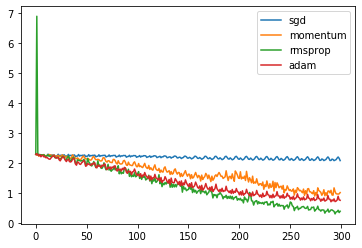

In [11]:
# Plot training error curve of optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_rmsprop, label="rmsprop")
plt.plot(loss_hist_adam, label="adam")
plt.legend()
plt.show()

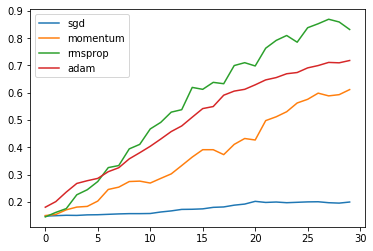

In [12]:
# Plot training accuracy curve of optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_rmsprop, label="rmsprop")
plt.plot(train_acc_hist_adam, label="adam")
plt.legend()
plt.show()

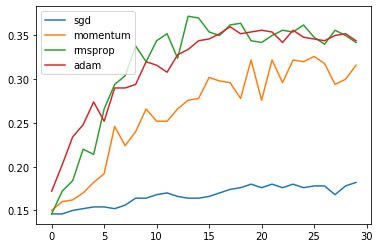

In [13]:
# Plot validation accuracy curve of optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_rmsprop, label="rmsprop")
plt.plot(val_acc_hist_adam, label="adam")
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> Describe your results, and discuss your understandings of these optimizers, such as their advantages/disadvantages and when to use them.

SGD + Momentum: SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum. Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction gamma of the update vector of the past time step to the current update vector. When using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity if there is air resistance, i.e. gamma < 1). The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.


RMS Prop: Divide the learning rate for a weight by a running average of the magnitudes of recent gradients for just that weight. This optimization algorithm seems to outperform the other two - highest validation accuracy using this method, highest training accuracy using this method, and lowest training error.
    
Adam: Adaptive Moment Estimation. Computes adaptive learning rates for each parameter. Stores an exponentially decaying average of past squared gradients and keeps an expeonentially decaying average of past gradients. Adam behaves like a heavy ball with friction, preferring flat minima in the error surface. Converges very fast and the learning speed is fast/efficient and also avoid/rectifies vanishing learning rate and loss function fluctuation. 